In [3]:
import pandas as pd
import numpy as np
from math import log2

In [127]:
dataSet=pd.read_excel("/Users/karanbudhaair/Downloads/Home_Loan.xlsx", header=None)   
dataSet=dataSet[6:].reset_index(drop=True)


In [128]:
dataSet.columns=dataSet.iloc[0]
dataSet=dataSet[1:].reset_index(drop=True)
dataSet

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95,360,3.5
2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.5
3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,37,40.28,80100,275000,3.4332,2,> 74,20,755000,505000,90,360,2.62
496,497,8,14.48,100000,79000,0.79,2,> 74,20,425000,315000,73.85,360,3
497,498,17,10.96,69300,187000,2.6984,2,> 74,10,325000,145000,43.75,180,2.87
498,499,26,33.82,79700,109000,1.3676,2,> 74,20,525000,385000,73.46,360,3.62


In [39]:
dataSet.isna().sum(axis=0)


0
Borrower ID Number                    0
Wide Area Location Code               0
% Minority in Local Area              0
Median Family Income in Local Area    0
Borrower Annual Income                0
Borrower Income Ratio                 0
First Time Buyer? (1=Yes, 2=No)       0
Age of Borrower                       0
Borrower Debt to Income Ratio         0
Appraised Value of Home               0
Amount Borrowed                       0
LTV Ratio                             0
Length of Mortgage in Months          0
Mortgage Interest Rate                0
dtype: int64

## Statistical Summary

In [40]:
dataSet.describe()

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,500,500,500.00,500,500,500.0000,500,500,500,500,500,500,500,500.00
unique,500,47,469.00,168,211,486.0000,2,7,18,95,66,355,4,42.00
top,1,6,10.96,83300,82000,0.7764,2,35 to 44,20,265000,245000,80,360,2.87
freq,1,80,3.00,26,10,2.0000,444,139,122,18,25,59,387,54.00


In [41]:
[~dataSet.columns.isin(["Age of Borrower"])]

[array([ True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True])]

In [42]:
dataSet.columns

Index(['Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Age of Borrower',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [43]:
dataSetPartOne=dataSet[dataSet.columns[~dataSet.columns.isin(["Age of Borrower"])]].apply(lambda x: pd.to_numeric(x))
newDataSet=dataSetPartOne.join(dataSet["Age of Borrower"])[dataSet.columns]

In [44]:
newDataSet[:5]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95.00,360,3.50
2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.50
3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80.00,180,2.87


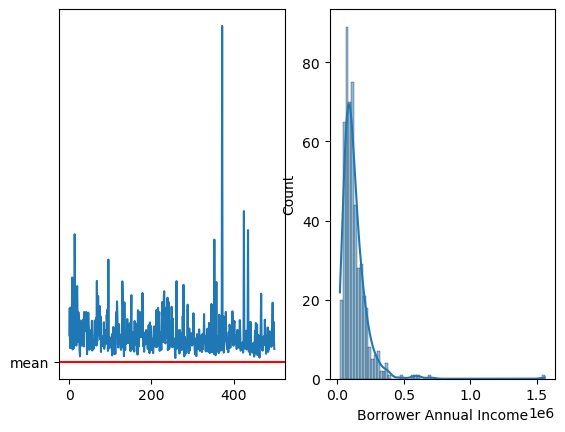

In [47]:
import matplotlib.pyplot as myplot
import seaborn as sns
fig,axes=myplot.subplots(1,2)
axes[0].plot(newDataSet["Borrower Annual Income"].values)
axes[0].axhline(y= 'mean', color='red')
#axes[1].hist(newDataSet["Borrower Annual Income"].values, bins='auto')
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto', ax=axes[1])
#newDataSet["Borrower Annual Income"].plot(kind='hist')
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Count'>

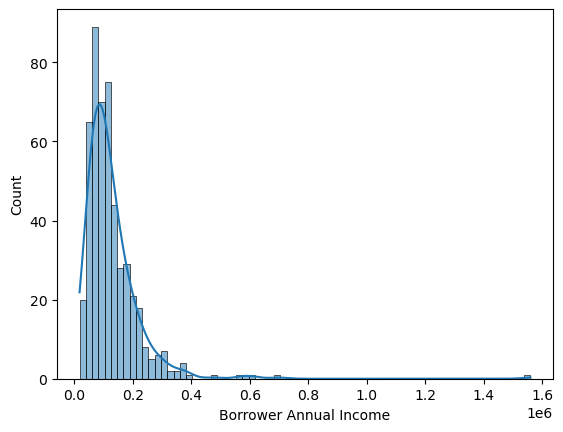

In [48]:
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto')

In [49]:
newDataSet[newDataSet["Borrower Annual Income"]==1560000]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
372,373,6,16.56,70700,1560000,22.0651,2,55 to 64,10,465000,325000,69.56,360,3.58


In [50]:
summary=newDataSet["Borrower Annual Income"].agg(['mean', 'median', 'std'])
summary

mean      127626.000000
median    105500.000000
std       105177.424885
Name: Borrower Annual Income, dtype: float64

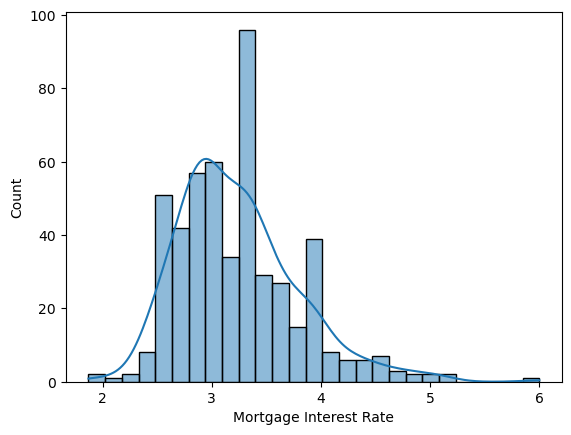

In [51]:
import seaborn as sns
sns.histplot(newDataSet['Mortgage Interest Rate'], bins='auto', kde=True)
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Density'>

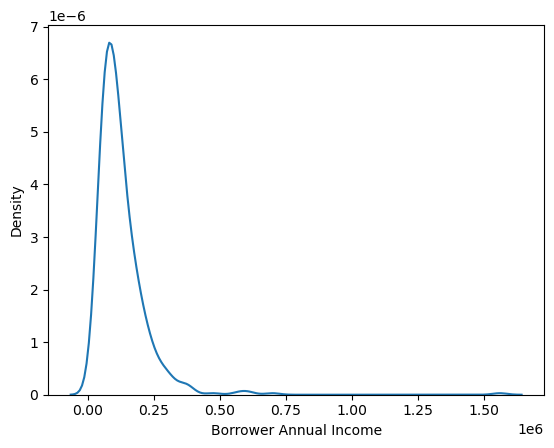

In [52]:
sns.kdeplot(newDataSet['Borrower Annual Income'], bw_adjust=0.9)

In [53]:
newDataSet[5:20]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
5,6,24,29.18,124900,255000,2.0416,2,< 25,20,905000,645000,71.44,360,2.86
6,7,8,81.63,100000,145000,1.4500,1,< 25,30,475000,395000,85.00,180,2.12
7,8,53,39.06,74600,392000,5.2547,2,< 25,20,265000,155000,60.00,360,2.99
8,9,36,98.09,96500,58000,0.6010,2,< 25,41,455000,185000,40.64,180,3.62
9,10,48,41.47,80000,170000,2.1250,2,< 25,20,535000,355000,65.60,180,2.37
10,11,34,40.18,96500,182000,1.8860,2,< 25,20,395000,305000,79.44,180,2.50
11,12,25,41.27,114000,64000,0.5614,2,< 25,44,465000,365000,80.00,360,4.62
12,13,6,84.75,127900,88000,0.6880,2,< 25,38,755000,385000,50.33,360,2.87
13,14,26,33.01,79700,593000,7.4404,2,< 25,20,545000,415000,75.00,360,4.75
14,15,6,34.80,127900,297000,2.3221,2,< 25,20,955000,765000,80.00,360,3.50


In [54]:
newDataSet["Borrower Annual Income"].agg(["mean","median"])

mean      127626.0
median    105500.0
Name: Borrower Annual Income, dtype: float64

In [55]:
value=newDataSet["Borrower Annual Income"].sort_values()[:499]
value.agg(["mean","median"])

mean      124755.511022
median    105000.000000
Name: Borrower Annual Income, dtype: float64

In [76]:
cat=pd.qcut(dataSet["Borrower Annual Income"],q=4)
print(cat)


0       (105500.0, 155250.0]
1      (155250.0, 1560000.0]
2       (17999.999, 69750.0]
3       (105500.0, 155250.0]
4       (105500.0, 155250.0]
               ...          
495    (155250.0, 1560000.0]
496      (69750.0, 105500.0]
497    (155250.0, 1560000.0]
498     (105500.0, 155250.0]
499     (17999.999, 69750.0]
Name: Borrower Annual Income, Length: 500, dtype: category
Categories (4, interval[float64, right]): [(17999.999, 69750.0] < (69750.0, 105500.0] < (105500.0, 155250.0] < (155250.0, 1560000.0]]


In [77]:
type(dataSet["Borrower Annual Income"])

pandas.core.series.Series

In [78]:
income_data=pd.concat([newDataSet["Borrower Annual Income"], cat], axis=1)
income_data.columns=["Income", "Category"]
income_data

,Income,Category
0,123000,"(105500.0, 155250.0]"
1,250000,"(155250.0, 1560000.0]"
2,64000,"(17999.999, 69750.0]"
3,141000,"(105500.0, 155250.0]"
4,109000,"(105500.0, 155250.0]"
...,...,...
495,275000,"(155250.0, 1560000.0]"
496,79000,"(69750.0, 105500.0]"
497,187000,"(155250.0, 1560000.0]"
498,109000,"(105500.0, 155250.0]"


In [79]:
grouped=income_data.groupby("Category")
grouped.groups.keys()

/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_1065/1909285007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=income_data.groupby("Category")


dict_keys([Interval(17999.999, 69750.0, closed='right'), Interval(69750.0, 105500.0, closed='right'), Interval(105500.0, 155250.0, closed='right'), Interval(155250.0, 1560000.0, closed='right')])

In [82]:
keys=grouped.groups.keys()
keys=list(keys)
print("list of keys", keys)
import numpy as np
keys=np.array(keys)
print('arrays', keys)
keys=keysArray.reshape((2,2))
keys

list of keys [Interval(17999.999, 69750.0, closed='right'), Interval(69750.0, 105500.0, closed='right'), Interval(105500.0, 155250.0, closed='right'), Interval(155250.0, 1560000.0, closed='right')]
arrays [Interval(17999.999, 69750.0, closed='right')
 Interval(69750.0, 105500.0, closed='right')
 Interval(105500.0, 155250.0, closed='right')
 Interval(155250.0, 1560000.0, closed='right')]


array([Interval(17999.999, 69750.0, closed='right'),
       Interval(69750.0, 105500.0, closed='right'),
       Interval(105500.0, 155250.0, closed='right'),
       Interval(155250.0, 1560000.0, closed='right')], dtype=object)

In [83]:
grouped.groups

{(17999.999, 69750.0]: [2, 8, 11, 25, 26, 43, 44, 49, 56, 59, 60, 77, 85, 94, 97, 100, 104, 109, 112, 119, 125, 126, 127, 128, 133, 136, 149, 152, 158, 166, 182, 191, 195, 200, 204, 213, 220, 224, 240, 243, 244, 251, 257, 258, 262, 268, 271, 272, 273, 275, 280, 284, 285, 291, 293, 305, 306, 309, 313, 314, 315, 317, 318, 319, 323, 325, 332, 335, 337, 338, 339, 341, 342, 347, 350, 352, 356, 359, 360, 361, 362, 364, 367, 370, 374, 376, 384, 385, 387, 389, 392, 407, 408, 414, 417, 418, 420, 421, 423, 424, ...], (69750.0, 105500.0]: [12, 17, 21, 28, 30, 32, 34, 35, 50, 53, 57, 58, 66, 68, 80, 81, 83, 88, 90, 96, 99, 102, 103, 106, 118, 122, 123, 135, 138, 143, 144, 146, 160, 161, 162, 165, 168, 169, 180, 183, 186, 190, 198, 201, 205, 209, 210, 217, 221, 223, 229, 233, 234, 245, 246, 248, 253, 255, 256, 259, 260, 263, 264, 266, 282, 283, 286, 287, 289, 294, 296, 298, 299, 300, 301, 310, 320, 326, 327, 329, 330, 331, 333, 351, 355, 377, 382, 383, 393, 399, 400, 403, 404, 411, 412, 419, 422, 4

In [105]:
grouped.get_group(pd.Interval(17999.999, 69750.0, closed='right'))

,Income,Category
2,64000,"(17999.999, 69750.0]"
8,58000,"(17999.999, 69750.0]"
11,64000,"(17999.999, 69750.0]"
25,54000,"(17999.999, 69750.0]"
26,26000,"(17999.999, 69750.0]"
...,...,...
479,38000,"(17999.999, 69750.0]"
484,47000,"(17999.999, 69750.0]"
485,64000,"(17999.999, 69750.0]"
486,62000,"(17999.999, 69750.0]"


In [91]:
keys=keys.reshape((2,2))
print(keys)

[[Interval(17999.999, 69750.0, closed='right')
  Interval(69750.0, 105500.0, closed='right')]
 [Interval(105500.0, 155250.0, closed='right')
  Interval(155250.0, 1560000.0, closed='right')]]


THe axes object has [[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
outer array is  0
THe index of inner array is  0
THe index of inner array is  1
outer array is  1
THe index of inner array is  0
THe index of inner array is  1


/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_1065/2631311528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  myplot.legend()
/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_1065/2631311528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  myplot.legend()
/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_1065/2631311528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  myplot.legend()


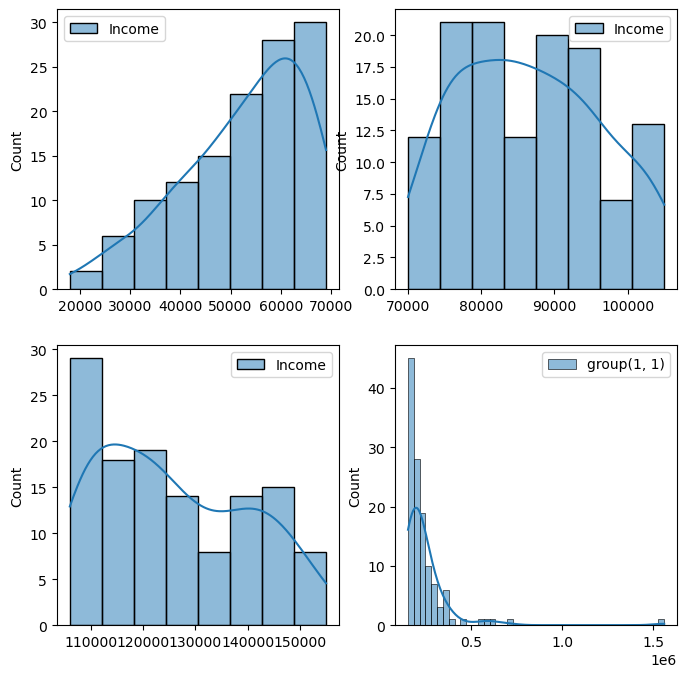

In [92]:
fig1,axes=myplot.subplots(2,2, figsize=(8,8))
print("THe axes object has", axes)
for index, plots in enumerate(axes):
    print("outer array is ", index)
    for i,plotN in enumerate(plots):
        print("THe index of inner array is ", i)
        sns.histplot(grouped.get_group(keys[index,i]), ax=axes[index,i], label=f'group{index,i}', kde=True)
        myplot.legend()
myplot.show()

In [93]:
first_group=grouped.get_group(keys[0,0])
second_group=grouped.get_group(keys[0,1])
third_group=grouped.get_group(keys[1,0])
fourth_group=grouped.get_group(keys[1,1])
print('the min of 1st group is', first_group.min(), 'the max is ', first_group.max(),'\n')
print('the min of 1st group is', second_group.min(), 'the max is ', second_group.max(),'\n')
print('the min of 1st group is', third_group.min(), 'the max is ', third_group.max(),'\n')
print('the min of 1st group is', fourth_group.min(), 'the max is ', fourth_group.max(),'\n')


the min of 1st group is Income                     18000
Category    (17999.999, 69750.0]
dtype: object the max is  Income                     69000
Category    (17999.999, 69750.0]
dtype: object 

the min of 1st group is Income                    70000
Category    (69750.0, 105500.0]
dtype: object the max is  Income                   105000
Category    (69750.0, 105500.0]
dtype: object 

the min of 1st group is Income                    106000
Category    (105500.0, 155250.0]
dtype: object the max is  Income                    155000
Category    (105500.0, 155250.0]
dtype: object 

the min of 1st group is Income                     156000
Category    (155250.0, 1560000.0]
dtype: object the max is  Income                    1560000
Category    (155250.0, 1560000.0]
dtype: object 



In [95]:
import math
#math.sqrt(first_group.var())

In [96]:
pd.DataFrame(first_group).info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 2 to 499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Income    125 non-null    int64   
 1   Category  125 non-null    category
dtypes: category(1), int64(1)
memory usage: 2.5 KB


In [111]:
first_group
#first_group=first_group.astype(float)

,Income,Category
2,64000,"(17999.999, 69750.0]"
8,58000,"(17999.999, 69750.0]"
11,64000,"(17999.999, 69750.0]"
25,54000,"(17999.999, 69750.0]"
26,26000,"(17999.999, 69750.0]"
...,...,...
479,38000,"(17999.999, 69750.0]"
484,47000,"(17999.999, 69750.0]"
485,64000,"(17999.999, 69750.0]"
486,62000,"(17999.999, 69750.0]"


In [112]:
emperical_stats=first_group.describe()
emperical_stats

,Income
count,125.00000
mean,52624.00000
std,12369.09781
min,18000.00000
25%,45000.00000
50%,55000.00000
75%,62000.00000
max,69000.00000


In [101]:
#fourth_group=fourth_group.astype(float)
#fourth_group.describe()

In [113]:
cv_first_group=first_group["Income"].std()/first_group["Income"].mean() *100
cv_first_group

23.5046705124612

In [ ]:
#23% of variation in group is not desriable <10% is okay to consisder homogenousness .

In [ ]:
sns.histplot(income_data["Income"],bins=100)
myplot.xlim(0,400000)

In [ ]:
dataSet[dataSet["Borrower Annual Income"]<80000]

In [ ]:
# 3:- Let the journey Begin 

In [13]:
# let us use the regression model to see the best attributes
dataSet.columns


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

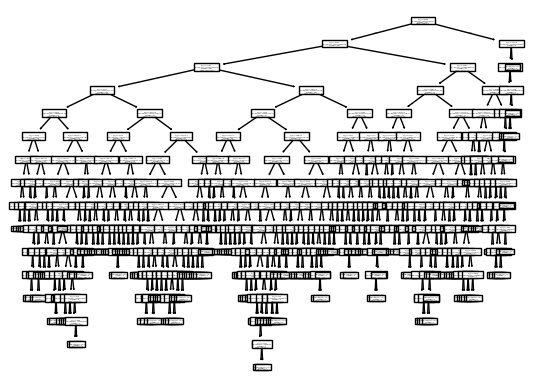

In [134]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Annual Income", "Age of Borrower"],axis=1)
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)
plot_tree(model)
myplot.show()



In [138]:
X_train[:2]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
249,250,12,25.71,68300,3.7482,2,20,785000,195000,25.29,120,2.75
433,434,47,25.68,80700,1.0409,2,10,275000,215000,80,360,2.99


In [226]:
from sklearn.tree import export_text
tree_rules= export_text(model, feature_names=X_train.columns)


In [146]:
#X_train.groupby("Borrower Income Ratio").groups

In [145]:
X_train

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
249,250,12,25.71,68300,3.7482,2,20,785000,195000,25.29,120,2.75
433,434,47,25.68,80700,1.0409,2,10,275000,215000,80,360,2.99
19,20,6,65.52,75000,4.6933,2,30,755000,505000,68,360,4.12
322,323,22,14.2,62800,1.9904,2,30,365000,285000,79,360,3.25
332,333,36,2.7,71700,0.6834,2,37,155000,135000,95,360,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,19,9.65,80600,1.0174,2,46,295000,235000,80.99,360,2.87
270,271,41,19.44,92100,1.3029,2,30,475000,375000,78.94,180,1.99
348,349,26,10.69,79700,2.0828,2,36,445000,335000,74.6,360,4.87
435,436,27,10.22,95600,6.4017,2,10,175000,75000,45.31,180,3.25


In [172]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet[["Borrower Income Ratio", "LTV Ratio"]]
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=4,
    random_state=42
)

print(X_train)
model.fit(X_train, y_train)


0   Borrower Income Ratio LTV Ratio
249                3.7482     25.29
433                1.0409        80
19                 4.6933        68
322                1.9904        79
332                0.6834        95
..                    ...       ...
106                1.0174     80.99
270                1.3029     78.94
348                2.0828      74.6
435                6.4017     45.31
102                0.8846     44.72

[400 rows x 2 columns]


DecisionTreeRegressor(random_state=42)

In [173]:
rules=export_text(model, feature_names=X_train.columns)
print(rules)


|--- Borrower Income Ratio <= 5.83
|   |--- Borrower Income Ratio <= 1.83
|   |   |--- Borrower Income Ratio <= 1.06
|   |   |   |--- Borrower Income Ratio <= 0.72
|   |   |   |   |--- Borrower Income Ratio <= 0.58
|   |   |   |   |   |--- Borrower Income Ratio <= 0.47
|   |   |   |   |   |   |--- Borrower Income Ratio <= 0.36
|   |   |   |   |   |   |   |--- Borrower Income Ratio <= 0.24
|   |   |   |   |   |   |   |   |--- value: [18000.00]
|   |   |   |   |   |   |   |--- Borrower Income Ratio >  0.24
|   |   |   |   |   |   |   |   |--- LTV Ratio <= 44.80
|   |   |   |   |   |   |   |   |   |--- Borrower Income Ratio <= 0.33
|   |   |   |   |   |   |   |   |   |   |--- value: [27000.00]
|   |   |   |   |   |   |   |   |   |--- Borrower Income Ratio >  0.33
|   |   |   |   |   |   |   |   |   |   |--- value: [26000.00]
|   |   |   |   |   |   |   |   |--- LTV Ratio >  44.80
|   |   |   |   |   |   |   |   |   |--- value: [20000.00]
|   |   |   |   |   |   |--- Borrower Income Ratio 

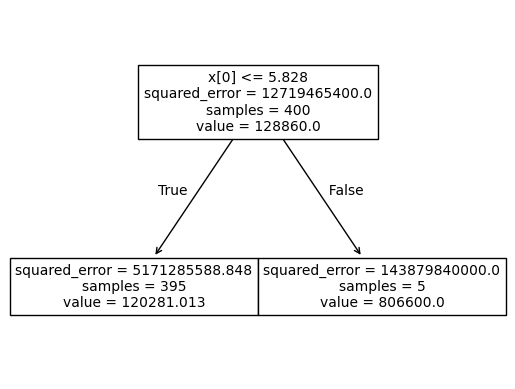

|--- Borrower Income Ratio <= 5.83
|   |--- value: [120281.01]
|--- Borrower Income Ratio >  5.83
|   |--- value: [806600.00]



In [195]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet[["Borrower Income Ratio", "LTV Ratio"]]
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=1,
    random_state=42
)


model.fit(X_train, y_train)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)

Index(['Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Income Ratio', 'First Time Buyer? (1=Yes, 2=No)',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)


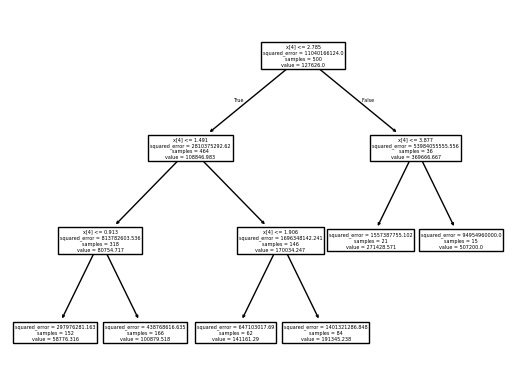

|--- Borrower Income Ratio <= 2.79
|   |--- Borrower Income Ratio <= 1.49
|   |   |--- Borrower Income Ratio <= 0.91
|   |   |   |--- value: [58776.32]
|   |   |--- Borrower Income Ratio >  0.91
|   |   |   |--- value: [100879.52]
|   |--- Borrower Income Ratio >  1.49
|   |   |--- Borrower Income Ratio <= 1.91
|   |   |   |--- value: [141161.29]
|   |   |--- Borrower Income Ratio >  1.91
|   |   |   |--- value: [191345.24]
|--- Borrower Income Ratio >  2.79
|   |--- Borrower Income Ratio <= 3.88
|   |   |--- value: [271428.57]
|   |--- Borrower Income Ratio >  3.88
|   |   |--- value: [507200.00]



In [325]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Annual Income","Age of Borrower"], axis=1)
y=dataSet["Borrower Annual Income"]

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.0001, random_state=42)
print(X_train.columns)

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3,
    random_state=42,
    min_samples_leaf=15
)


model.fit(X, y)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)


In [364]:
target=dataSet["Borrower Annual Income"]
feature=dataSet["Borrower Income Ratio"]
left_tree=target[feature>3.88]
right_tree=target[(feature>2.79) & (feature<=3.88)]
print(right_tree[:5])
print("The length of right tree is ", len(right_tree))
print("The length of left tree is ", len(left_tree))
print("the mean", left_tree.mean())
print("the mean", right_tree.mean())
print("The left Variance is ",left_tree.var())
print("The right Variance is ",right_tree.var())
print("The parent variance is ", target.var())

1     250000
36    232000
47    173000
70    306000
74    259000
Name: Borrower Annual Income, dtype: object
The length of right tree is  22
The length of left tree is  14
the mean 523642.85714285716
the mean 271681.8181818182
The left Variance is  105195939560.43954
The right Variance is  1558798701.298701
The parent variance is  11062290705.410822


In [365]:
target=dataSet["Borrower Annual Income"]
feature=dataSet["Borrower Income Ratio"]
left_tree=target[(feature>1.49) & (feature<=1.91)]
right_tree=target[(feature>1.91) & (feature<=2.79)]
print(right_tree[:5])
print("The length of right tree is ", len(right_tree))
print("The length of left tree is ", len(left_tree))
print("the mean", left_tree.mean())
print("the mean", right_tree.mean())
print("The left Variance is ",left_tree.var())
print("The right Variance is ",right_tree.var())
print("The parent variance is ", target.var())

5     255000
9     170000
14    297000
15    204000
16    214000
Name: Borrower Annual Income, dtype: object
The length of right tree is  84
The length of left tree is  62
the mean 141161.29032258064
the mean 191345.2380952381
The left Variance is  657711263.8815442
The right Variance is  1418204675.8462422
The parent variance is  11062290705.410822


In [367]:
v_parent=target.var()

In [366]:
right_tree_var=(22/36)*right_tree.var()

right_tree_var

866680635.2393703

In [368]:
left_tree_var=(14/36)* left_tree.var()
left_tree_var

255776602.62060055

In [369]:
v_red_perc=( v_parent- (right_tree_var + left_tree_var) ) / v_parent
v_red_perc

0.898533019267795

The length of right tree is  176
The length of left tree is  204
The left Variance is  392366536.2696802
The right Variance is  740904902.5974026
The parent variance is  11062290705.410822


In [332]:
# The above number does not make sense without calculating the variance percentange reduction
# v_reduced= (v_parent - v_after)/ v_parent
v_parent=target.var()
v_after= (176/380 * right_tree.var() )+ (204/380 * left_tree.var())
v_reduced= (v_parent - v_after) / v_parent
v_reduced *100 

94.99385030640921

5     255000
9     170000
14    297000
15    204000
16    214000
Name: Borrower Annual Income, dtype: object
The length of right tree is  85
The length of left tree is  30
the mean 301133.3333333333
the mean 191929.41176470587
The left Variance is  3862533333.333334
The right Variance is  1430328291.3165264
The parent variance is  11062290705.410822


In [334]:
v_parent=target.var()
v_after= (85/115 * right_tree.var() )+ (30/115 * left_tree.var())
v_reduced= (v_parent - v_after) / v_parent
v_reduced *100 

81.33463838428105

In [383]:
new_data=dataSet[dataSet["Borrower Income Ratio" ]>  3.88][["Borrower Income Ratio","Borrower Annual Income"]]

In [384]:
new_data

,Borrower Income Ratio,Borrower Annual Income
7,5.2547,392000
13,7.4404,593000
19,4.6933,352000
67,4.3823,376000
95,4.8668,475000
129,4.7103,374000
261,4.4326,375000
288,3.906,266000
353,7.867,568000
358,4.0022,371000


Index(['Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'First Time Buyer? (1=Yes, 2=No)', 'Borrower Debt to Income Ratio',
       'Appraised Value of Home', 'Amount Borrowed', 'LTV Ratio',
       'Length of Mortgage in Months', 'Mortgage Interest Rate'],
      dtype='object', name=0)


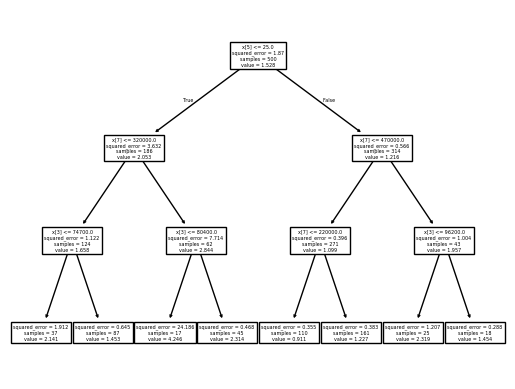

|--- Borrower Debt to Income Ratio <= 25.00
|   |--- Amount Borrowed <= 320000.00
|   |   |--- Median Family Income in Local Area <= 74700.00
|   |   |   |--- value: [2.14]
|   |   |--- Median Family Income in Local Area >  74700.00
|   |   |   |--- value: [1.45]
|   |--- Amount Borrowed >  320000.00
|   |   |--- Median Family Income in Local Area <= 80400.00
|   |   |   |--- value: [4.25]
|   |   |--- Median Family Income in Local Area >  80400.00
|   |   |   |--- value: [2.31]
|--- Borrower Debt to Income Ratio >  25.00
|   |--- Amount Borrowed <= 470000.00
|   |   |--- Amount Borrowed <= 220000.00
|   |   |   |--- value: [0.91]
|   |   |--- Amount Borrowed >  220000.00
|   |   |   |--- value: [1.23]
|   |--- Amount Borrowed >  470000.00
|   |   |--- Median Family Income in Local Area <= 96200.00
|   |   |   |--- value: [2.32]
|   |   |--- Median Family Income in Local Area >  96200.00
|   |   |   |--- value: [1.45]



In [381]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Income Ratio","Age of Borrower","Borrower Annual Income"], axis=1)
y=dataSet["Borrower Income Ratio"]

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.0001, random_state=42)
print(X_train.columns)

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3,
    random_state=42,
    min_samples_leaf=15
)


model.fit(X, y)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)

In [432]:
data_for_clustering=dataSet.drop(["Age of Borrower"], axis=1)
data_for_clustering

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,1,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5
2,3,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5
3,4,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62
496,497,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3
497,498,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87
498,499,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62


In [433]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_for_clustering)
data_for_clustering['cluster']=kmeans.labels_
data_for_clustering

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,cluster
0,1,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,2
1,2,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,0
2,3,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,2
3,4,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,0
4,5,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,0
496,497,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,2
497,498,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87,2
498,499,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62,0


In [434]:
clusters=data_for_clustering.groupby(by="cluster")
clusters.groups

{0: [1, 3, 6, 9, 11, 12, 13, 16, 18, 19, 22, 23, 24, 27, 29, 34, 36, 39, 41, 42, 46, 54, 55, 57, 63, 67, 73, 74, 88, 89, 90, 91, 93, 95, 103, 107, 113, 116, 117, 120, 122, 128, 130, 132, 135, 137, 139, 140, 141, 142, 143, 145, 146, 147, 148, 151, 157, 158, 159, 170, 174, 175, 177, 178, 180, 181, 185, 188, 192, 194, 196, 197, 198, 200, 206, 207, 209, 211, 212, 213, 214, 217, 218, 219, 222, 225, 226, 228, 230, 234, 236, 237, 238, 239, 241, 245, 247, 249, 252, 253, ...], 1: [5, 14, 62, 70, 72, 76, 78, 84, 102, 114, 131, 162, 163, 167, 216, 229, 231, 235, 242, 261, 311, 334, 340, 363, 369, 373, 381, 401, 410, 457, 473, 478], 2: [0, 2, 4, 7, 8, 10, 15, 17, 20, 21, 25, 26, 28, 30, 31, 32, 33, 35, 37, 38, 40, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 56, 58, 59, 60, 61, 64, 65, 66, 68, 69, 71, 75, 77, 79, 80, 81, 82, 83, 85, 86, 87, 92, 94, 96, 97, 98, 99, 100, 101, 104, 105, 106, 108, 109, 110, 111, 112, 115, 118, 119, 121, 123, 124, 125, 126, 127, 129, 133, 134, 136, 138, 144, 149, 150, 152, 

In [435]:
first_cluster=clusters.get_group(0)
first_cluster


,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,cluster
1,2,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,0
3,4,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,0
6,7,8,81.63,100000,145000,1.45,1,30,475000,395000,85,180,2.12,0
9,10,48,41.47,80000,170000,2.125,2,20,535000,355000,65.6,180,2.37,0
11,12,25,41.27,114000,64000,0.5614,2,44,465000,365000,80,360,4.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,491,6,17.59,92700,97000,1.0464,2,44,765000,605000,79,360,2.69,0
492,493,6,44.8,102700,70000,0.6816,2,45,655000,145000,22.41,120,2.5,0
494,495,8,21.49,100000,172000,1.72,2,20,535000,375000,70,360,3.5,0
495,496,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,0


In [436]:
second_cluster=clusters.get_group(1)
second_cluster



,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,cluster
5,6,24,29.18,124900,255000,2.0416,2,20,905000,645000,71.44,360,2.86,1
14,15,6,34.8,127900,297000,2.3221,2,20,955000,765000,80,360,3.5,1
62,63,6,29.96,83300,192000,2.3049,2,20,965000,585000,60.2,360,3.37,1
70,71,6,35.67,83300,306000,3.6735,2,10,835000,535000,64.81,360,3.25,1
72,73,53,24.46,106900,124000,1.16,2,30,865000,495000,57.66,360,3.5,1
76,77,6,59.79,83300,212000,2.545,2,20,835000,545000,65.62,360,3.5,1
78,79,53,21.32,106900,115000,1.0758,2,42,955000,485000,56.1,360,3.37,1
84,85,6,37.36,83300,184000,2.2089,2,48,995000,505000,51.04,240,2.5,1
102,103,6,51.32,92700,82000,0.8846,2,47,995000,445000,44.72,360,2.37,1
114,115,17,12.95,89100,231000,2.5926,2,20,1465000,505000,34.95,360,2.99,1


In [437]:
third_cluster=clusters.get_group(2)
print(third_cluster.shape)
third_cluster



(307, 14)


,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,cluster
0,1,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,2
2,3,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,2
4,5,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,2
7,8,53,39.06,74600,392000,5.2547,2,20,265000,155000,60,360,2.99,2
8,9,36,98.09,96500,58000,0.601,2,41,455000,185000,40.64,180,3.62,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,492,37,25.24,94100,95000,1.0096,1,30,405000,345000,85.91,360,2.62,2
493,494,4,17.66,77800,104000,1.3368,2,10,475000,205000,43.28,180,2.75,2
496,497,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,2
497,498,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87,2


In [438]:
kmeans.cluster_centers_

array([[2.31031056e+02, 2.34472050e+01, 3.30779503e+01, 9.11024845e+04,
        1.73397516e+05, 2.00701242e+00, 1.95031056e+00, 3.07329193e+01,
        5.95062112e+05, 3.98291925e+05, 6.89608075e+01, 3.31304348e+02,
        3.15776398e+00],
       [2.32375000e+02, 1.67187500e+01, 3.90287500e+01, 9.90937500e+04,
        1.89093750e+05, 1.98239688e+00, 1.93750000e+00, 2.97187500e+01,
        1.09968750e+06, 5.36875000e+05, 5.15709375e+01, 3.24375000e+02,
        3.07125000e+00],
       [2.62599349e+02, 2.74364821e+01, 2.47053746e+01, 8.08195440e+04,
        9.72149837e+04, 1.22903225e+00, 1.85016287e+00, 3.01270358e+01,
        2.81384365e+05, 2.01091205e+05, 7.35977199e+01, 3.18371336e+02,
        3.29280130e+00]])

In [440]:
data_for_clustering.groupby(by="cluster").mean()

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
cluster,,,,,,,,,,,,,
0,231.031056,23.447205,33.07795,91102.484472,173397.515528,2.007012,1.950311,30.732919,595062.111801,398291.925466,68.960807,331.304348,3.157764
1,232.375,16.71875,39.02875,99093.75,189093.75,1.982397,1.9375,29.71875,1099687.5,536875.0,51.570938,324.375,3.07125
2,262.599349,27.436482,24.705375,80819.543974,97214.983713,1.229032,1.850163,30.127036,281384.364821,201091.205212,73.59772,318.371336,3.292801


In [451]:
from sklearn.cluster import KMeans
new_data_for_cluster=dataSet.drop(["Borrower ID Number","Age of Borrower"], axis=1)
new_kmeans=KMeans( random_state=42)
new_kmeans.fit(new_data_for_cluster)
new_kmeans.cluster_centers_

new_data_for_cluster["clusters"]=new_kmeans.labels_
new_kmeans.n_clusters

8

In [452]:
new_data_for_cluster.groupby("clusters").mean()

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
clusters,,,,,,,,,,,,
0,27.335366,26.171037,82319.512195,104359.756098,1.314004,1.859756,29.310976,308780.487805,227012.195122,75.281341,325.97561,3.269146
1,18.571429,35.698929,98000.0,181357.142857,1.898229,1.964286,30.75,911071.428571,552500.0,61.429643,334.285714,3.107143
2,28.281553,23.173689,77271.84466,73077.669903,0.961279,1.834951,31.514563,188883.495146,128495.145631,72.146893,315.145631,3.407864
3,15.230769,42.243077,95157.692308,113692.307692,1.24485,2.0,33.384615,757307.692308,307307.692308,41.521538,300.0,2.891154
4,18.888889,32.237778,93355.555556,205111.111111,2.244989,1.888889,32.333333,1456111.111111,566111.111111,41.656667,313.333333,2.941111
5,21.953846,34.035231,93435.384615,196984.615385,2.180288,1.938462,29.292308,631923.076923,466846.153846,75.113538,348.923077,3.280308
6,26.81,27.3998,86671.0,124540.0,1.486709,1.9,30.91,458000.0,320900.0,71.5344,314.4,3.1124
7,28.6,27.956,78400.0,806600.0,10.65186,2.0,16.0,421000.0,317000.0,71.974,288.0,3.464


In [454]:
first=new_data_for_cluster.groupby(by='clusters').get_group(0)
first

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,0
7,53,39.06,74600,392000,5.2547,2,20,265000,155000,60,360,2.99,0
15,24,67.43,104000,204000,1.9615,2,30,385000,175000,65.11,180,2.87,0
21,49,20.03,85300,93000,1.0903,2,20,305000,235000,78.83,360,3.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,4,35.98,77800,100000,1.2853,2,30,245000,185000,79,360,3.99,0
485,6,22.09,66100,64000,0.9682,2,48,335000,265000,80,360,4.37,0
486,22,31.96,54400,62000,1.1397,2,45,355000,285000,79.63,360,2.75,0
489,26,40.65,101500,75000,0.7389,2,45,265000,245000,94.82,360,3.37,0


<Axes: ylabel='Borrower Income Ratio'>

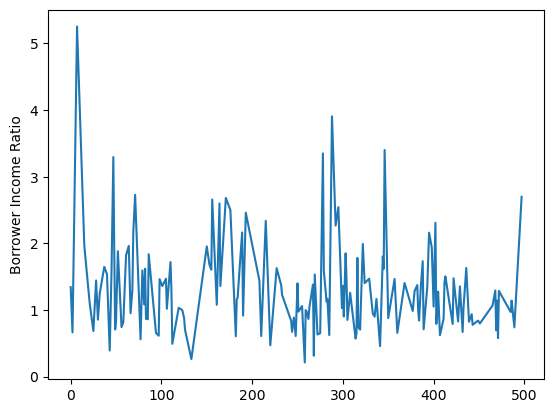

In [457]:
import seaborn as sns
sns.lineplot(first["Borrower Income Ratio"].sort_values())

In [465]:
a=first["Borrower Income Ratio"].sort_values().reset_index(drop=True)
a

0      0.2113
1      0.2626
2      0.3122
3      0.3909
4      0.4564
        ...  
159    3.2952
160    3.3489
161    3.4008
162     3.906
163    5.2547
Name: Borrower Income Ratio, Length: 164, dtype: object

<Axes: xlabel='Borrower Income Ratio', ylabel='Count'>

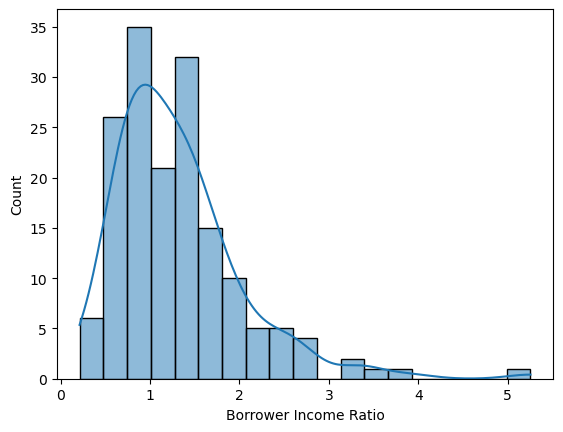

In [471]:
sns.histplot(first["Borrower Income Ratio"].sort_values().reset_index(drop=True), kde=True)

<Axes: xlabel='Borrower Income Ratio', ylabel='Count'>

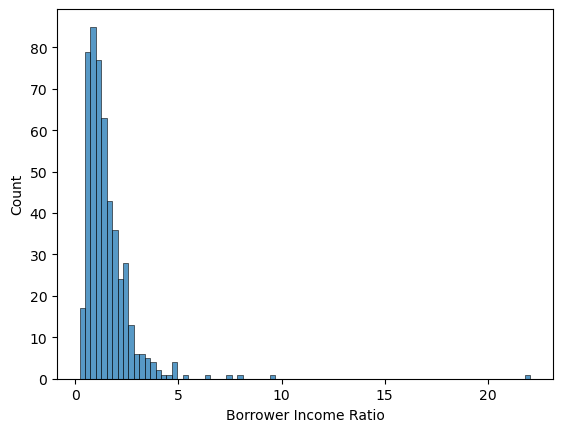

In [472]:
sns.histplot(dataSet["Borrower Income Ratio"].sort_values().reset_index(drop=True) )

<Axes: xlabel='Borrower Income Ratio', ylabel='Count'>

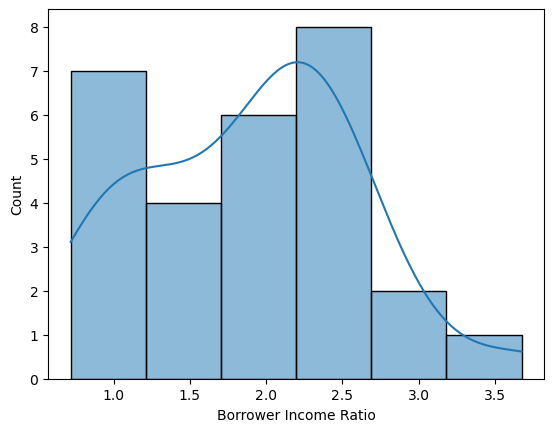

In [473]:
sns.histplot(new_data_for_cluster.groupby(by='clusters').get_group(1)["Borrower Income Ratio"].reset_index(drop=True),kde= True)

In [474]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [475]:
new_data_for_cluster

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,5
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,0
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,3
4,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,5
496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,6
497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87,0
498,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62,6


In [476]:
data_for_clustering.columns

Index(['Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Borrower Debt to Income Ratio',
       'Appraised Value of Home', 'Amount Borrowed', 'LTV Ratio',
       'Length of Mortgage in Months', 'Mortgage Interest Rate', 'cluster'],
      dtype='object', name=0)

In [504]:
# NOw let us use elbow(inertia) to find the best value of K
from sklearn.cluster import KMeans
inertia1=[]
K =range(1,16)
data1=data_for_clustering.drop(["Borrower ID Number","cluster","Borrower Annual Income"], axis=1)
for k in K:
    kmean=KMeans(n_clusters=k, random_state=42)
    kmean.fit(data1)
    inertia1.append(kmean.inertia_)
print(inertia1)

[41792634623094.91, 16061141055374.703, 9931559352301.938, 6859196278157.838, 5341028236207.998, 4675675789801.266, 3593059321660.3545, 3355849678247.8057, 3010006431501.1846, 2738228175258.405, 2387374135743.767, 2233832553908.929, 2043109793979.3794, 1915199238953.9692, 1764079683174.9292]


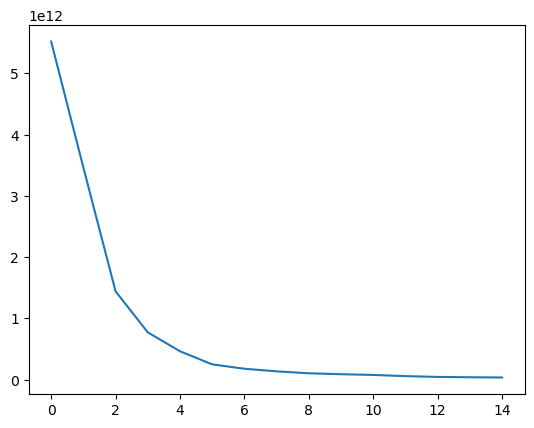

In [500]:
myplot.plot(pd.Series(inertia))

In [484]:
pd.Series(inertia)

0     4.731272e+13
1     2.089651e+13
2     1.478826e+13
3     1.161933e+13
4     9.923323e+12
5     7.907112e+12
6     6.903266e+12
7     6.196290e+12
8     5.844405e+12
9     5.474594e+12
10    4.663863e+12
11    4.372301e+12
12    4.052696e+12
13    3.820762e+12
14    3.661640e+12
dtype: float64

In [515]:
# NOw let us use elbow(inertia) to find the best value of K
from sklearn.cluster import KMeans
inertia=[]

K =range(1,6)

for k in K:
    kmean=KMeans(n_clusters=k, random_state=42)
    kmean.fit(data1)
    inertia.append(kmean.inertia_)
print(inertia)
clusters=kmean.labels_

print(len(clusters))
k_five_means_data_set=data1
k_five_means_data_set["Cluster"]=clusters
k_five_means_data_set

[41792634623094.91, 16061141055374.703, 9931559352301.938, 6859196278157.838, 5341028236207.998]
500


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
0,53,29.57,91700,1.3413,2,10,385000,195000,50.65,360,2.75,0
1,6,90.76,83300,3.0012,2,30,535000,505000,95,360,3.5,3
2,34,64.19,96500,0.6632,2,43,375000,105000,28.55,180,2.5,0
3,51,34.58,124900,1.1289,2,46,665000,345000,51.51,180,2.25,3
4,39,17.93,84600,1.2884,1,30,405000,325000,80,180,2.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,37,40.28,80100,3.4332,2,20,755000,505000,90,360,2.62,2
496,8,14.48,100000,0.79,2,20,425000,315000,73.85,360,3,0
497,17,10.96,69300,2.6984,2,10,325000,145000,43.75,180,2.87,0
498,26,33.82,79700,1.3676,2,20,525000,385000,73.46,360,3.62,3


In [ ]:
# Now the task comes of cross checking these clusters(k=5) with the help of scatterplot where we will use PCA